In [61]:
import matplotlib.pyplot as plt
from zipfile import ZipFile
import cv2
import os

In [62]:
fpath = '/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset'

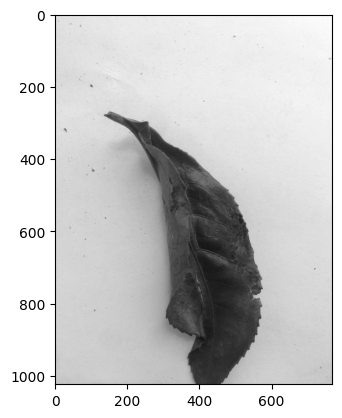

In [63]:
for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath,cpath)
  for imgpath in os.listdir(cpath):
    img = cv2.imread(os.path.join(cpath, imgpath), 0)
    plt.imshow(img, cmap='gray')
    break

In [64]:
class_names = []
for x in os.walk(fpath):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    x_class = (sub_dir_list[-1])
    class_names.append(x_class)

print(class_names)

['tea sickness dataset', 'white spot', 'Anthracnose', 'healthy', 'bird eye spot', 'brown blight', 'red leaf spot', 'gray light', 'algal leaf']


# Displaying 5 images of healthy as well as each disease

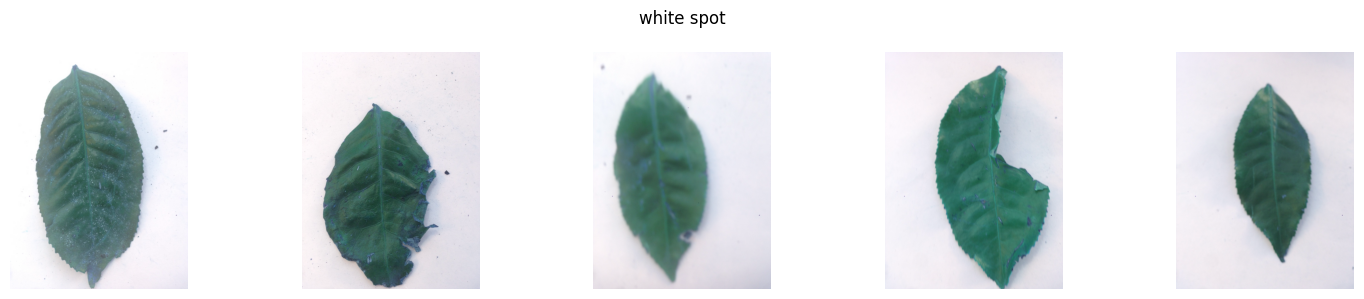

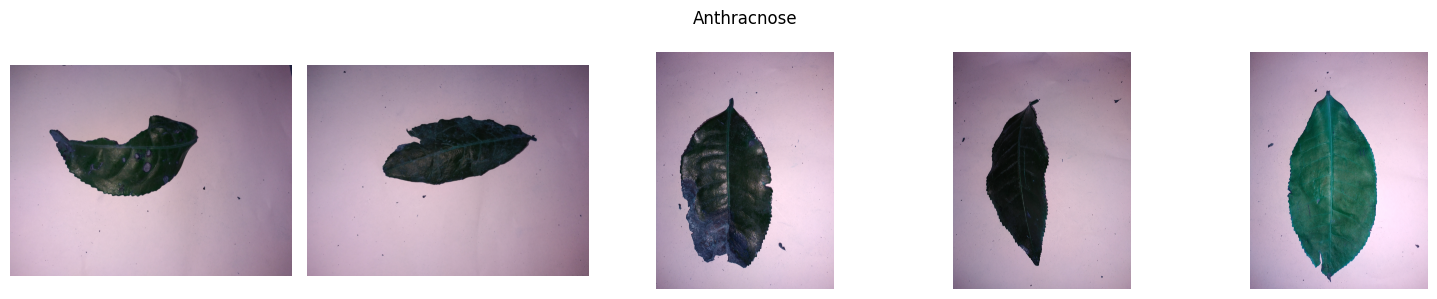

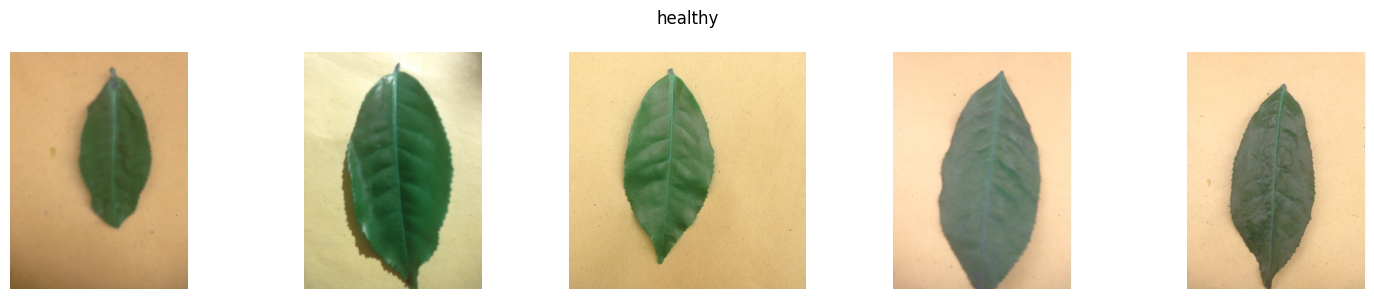

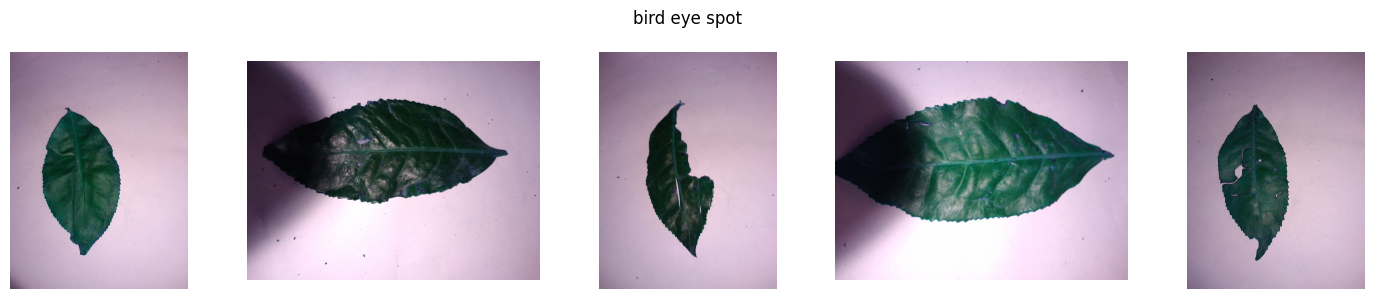

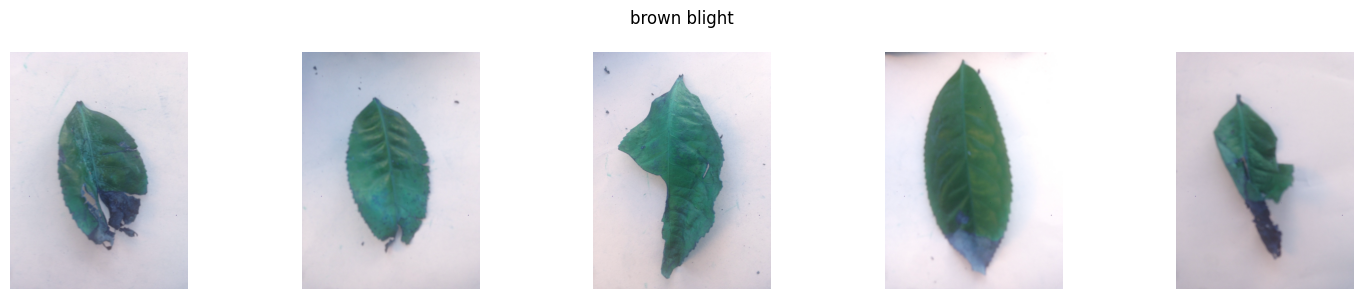

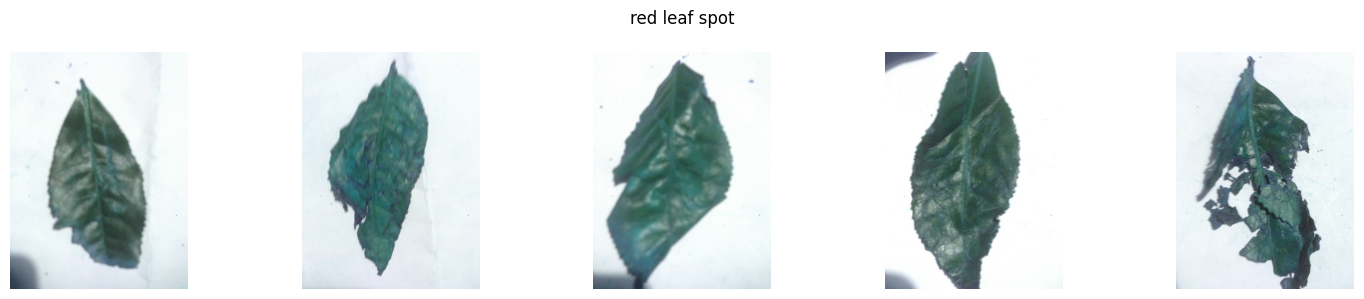

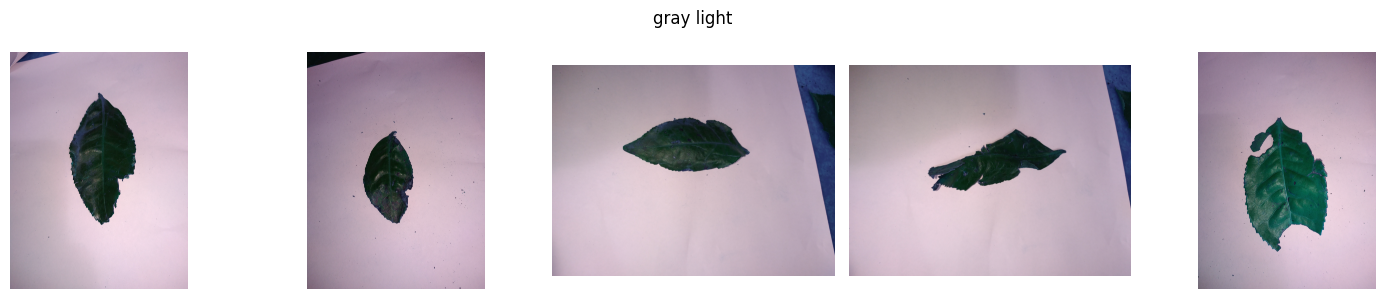

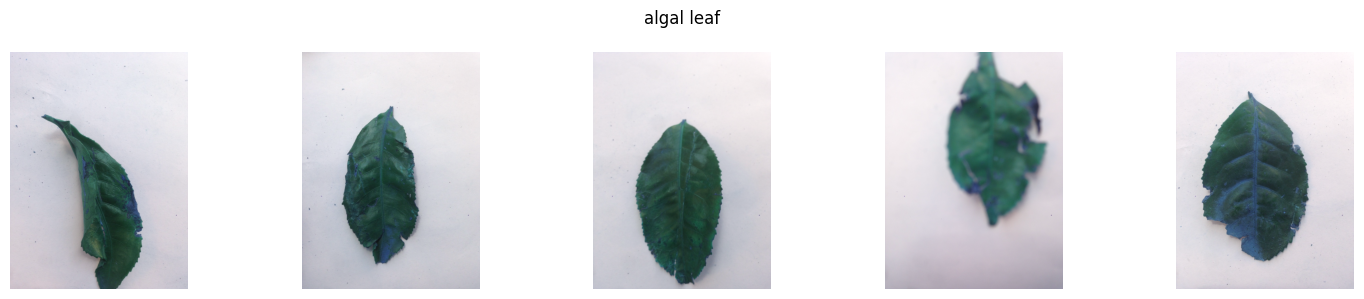

In [65]:
import matplotlib.pyplot as plt
import cv2
import os

for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath, cpath)

  img_paths = [os.path.join(cpath, imgpath) for imgpath in os.listdir(cpath)]


  fig, axs = plt.subplots(1, 5, figsize=(15, 3))


  for i, img_path in enumerate(img_paths[:5]):
    img = cv2.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

  fig.suptitle(os.path.basename(cpath))

  plt.tight_layout()
  plt.show()


# Displaying Total number of images in the dataset

In [66]:
total_images = 0
for cpath in os.listdir(fpath):
    cpath = os.path.join(fpath, cpath)

    for imgpath in os.listdir(cpath):
        # Increment the total image count
        total_images = total_images + 1

In [67]:
print(total_images)

885


In [68]:
target_folder = 'Anthracnose'
anthfolder = os.path.join(fpath,target_folder)
len(os.listdir(anthfolder))

100

In [69]:
target_folders = ['Anthracnose','algal leaf','bird eye spot','brown blight','gray light','healthy','red leaf spot','white spot']

for folder in target_folders:
  currFolder = os.path.join(fpath,folder)
  print("Number of images in",folder,"is : ",len(os.listdir(currFolder)))

Number of images in Anthracnose is :  100
Number of images in algal leaf is :  113
Number of images in bird eye spot is :  100
Number of images in brown blight is :  113
Number of images in gray light is :  100
Number of images in healthy is :  74
Number of images in red leaf spot is :  143
Number of images in white spot is :  142


# Spliting Dataset for training, testing and validation

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import cv2
from sklearn.model_selection import train_test_split

In [71]:
filepath = []
labels = []
for label in os.listdir(fpath):
  for img_path in os.listdir(os.path.join(fpath, label)):
    filepath.append(os.path.join(fpath, label, img_path))
    labels.append(label)
labels = pd.Series(labels, name='labels')
filepaths = pd.Series(filepath, name='filepaths')
df = pd.concat([filepaths, labels], axis=1)

In [72]:
df.head()

filepaths      labels
0  /kaggle/input/identifying-disease-in-tea-leafs...  white spot
1  /kaggle/input/identifying-disease-in-tea-leafs...  white spot
2  /kaggle/input/identifying-disease-in-tea-leafs...  white spot
3  /kaggle/input/identifying-disease-in-tea-leafs...  white spot
4  /kaggle/input/identifying-disease-in-tea-leafs...  white spot

In [73]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [74]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1/255.0,
    validation_split = 0.2
)
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     rescale=1/255.0,
#     validation_split=0.2
# )

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0
)

In [75]:
train_dataset = train_datagen.flow_from_dataframe(
  df_train,
  x_col = 'filepaths',
  y_col = 'labels',
  color_mode='rgb',
  subset="training",
  target_size = (256,256)
)

validation_dataset = train_datagen.flow_from_dataframe(
  df_train,
  x_col = 'filepaths',
  y_col = 'labels',
  color_mode='rgb',
  subset="validation",
  target_size = (256,256)
)

Found 567 validated image filenames belonging to 8 classes.
Found 141 validated image filenames belonging to 8 classes.


In [76]:
test_dataset = train_datagen.flow_from_dataframe(
    df_test,
    x_col = 'filepaths',
    y_col = 'labels',
    color_mode='rgb',
    target_size = (256,256)
)

Found 177 validated image filenames belonging to 8 classes.


# Defining the VGG model

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [78]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding = 'same',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [79]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │   134,221,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,750,600 (632.29 MB)

 Trainable params: 165,750,600 (632.29 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [82]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs,
  batch_size=32,
  callbacks=[early_stopping]
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
W0000 00:00:1712516455.196645      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 8/18 ━━━━━━━━━━━━━━━━━━━━ 9s 953ms/step - accuracy: 0.1049 - loss: 2.0719 

W0000 00:00:1712516468.049576      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1280 - loss: 2.0642

W0000 00:00:1712516476.302295      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712516480.126900      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.1290 - loss: 2.0637 - val_accuracy: 0.1348 - val_loss: 2.0058
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1646 - loss: 1.9966 - val_accuracy: 0.1348 - val_loss: 1.8614
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1937 - loss: 1.8381 - val_accuracy: 0.3617 - val_loss: 1.6273
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2716 - loss: 1.5808 - val_accuracy: 0.3830 - val_loss: 1.2624
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3517 - loss: 1.3364 - val_accuracy: 0.4468 - val_loss: 1.1330
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3906 - loss: 1.2309 - val_accuracy: 0.4043 - val_loss: 1.2284
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3947 - loss: 1.2995 - val_accuracy: 0.4255 - val_loss: 1.1419
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4500 - loss: 1.1782 - val_accuracy: 0.4894 - val_loss: 1.1408
Epo

In [83]:
epochs=20
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs,
  batch_size=32,
  callbacks=[early_stopping]
)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5505 - loss: 1.0215 - val_accuracy: 0.4752 - val_loss: 1.1362
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5316 - loss: 1.0094 - val_accuracy: 0.5248 - val_loss: 1.1236
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5124 - loss: 1.1425 - val_accuracy: 0.5106 - val_loss: 1.0427
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5287 - loss: 0.9690 - val_accuracy: 0.7021 - val_loss: 0.8216
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5933 - loss: 0.8889 - val_accuracy: 0.6383 - val_loss: 0.8427
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6468 - loss: 0.8049 - val_accuracy: 0.7163 - val_loss: 0.7709
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6593 - loss: 0.7578 - val_accuracy: 0.5957 - val_loss: 0.9032
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6884 - loss: 0.7262 - val_accuracy: 0.6241 - val_loss:

In [84]:
epochs=30
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs,
  batch_size=32,
  # callbacks=[early_stopping]
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7323 - loss: 0.7159 - val_accuracy: 0.6312 - val_loss: 0.7940
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6851 - loss: 0.7116 - val_accuracy: 0.6383 - val_loss: 0.8006
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7120 - loss: 0.6800 - val_accuracy: 0.6596 - val_loss: 0.7855
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7139 - loss: 0.6960 - val_accuracy: 0.6525 - val_loss: 0.8279
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6771 - loss: 0.7286 - val_accuracy: 0.6596 - val_loss: 0.7778
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6932 - loss: 0.6625 - val_accuracy: 0.5887 - val_loss: 0.8969
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6738 - loss: 0.7277 - val_accuracy: 0.6454 - val_loss: 0.8572
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6892 - loss: 0.7395 - val_accuracy: 0.6879 - val_loss:

In [85]:
epochs=30
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs,
  batch_size=32,
  callbacks=[early_stopping]
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8810 - loss: 0.2824 - val_accuracy: 0.8227 - val_loss: 0.6668
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8767 - loss: 0.2671 - val_accuracy: 0.8085 - val_loss: 0.5153
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8576 - loss: 0.3415 - val_accuracy: 0.7801 - val_loss: 0.5735
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9447 - loss: 0.1625 - val_accuracy: 0.7589 - val_loss: 0.8162
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8956 - loss: 0.2573 - val_accuracy: 0.8440 - val_loss: 0.4178
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9448 - loss: 0.1826 - val_accuracy: 0.7730 - val_loss: 0.7298
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8260 - loss: 0.4334 - val_accuracy: 0.7872 - val_loss: 0.6501
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9310 - loss: 0.2280 - val_accuracy: 0.8652 - val_loss:

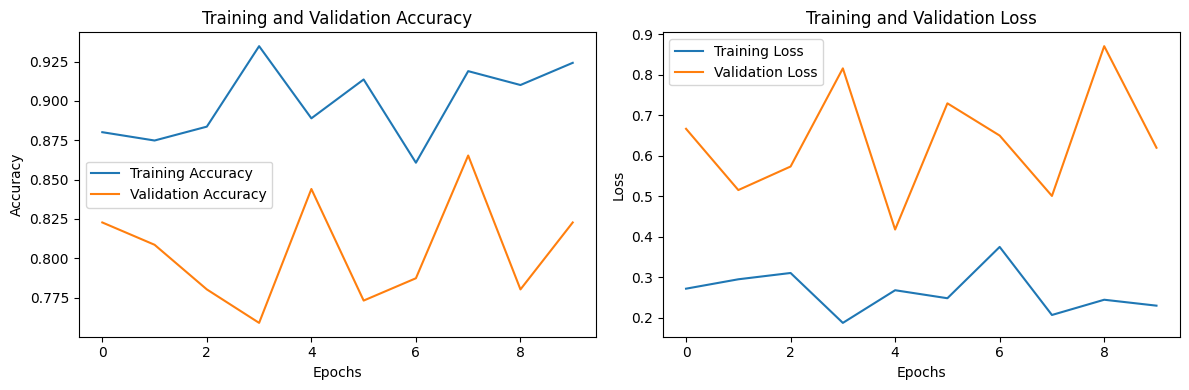

In [86]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [87]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Accuracy:", test_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7682 - loss: 0.5713
Test Accuracy: 0.7740113139152527


W0000 00:00:1712518287.007834      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [91]:
test_image_path = '/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/bird eye spot/IMG_20220503_154632.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (256, 256))
test_image = np.expand_dims(test_image, axis=0) / 255.0

prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: bird eye spot


In [92]:
test_image_path = '/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/Anthracnose/IMG_20220503_144612.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (256, 256))
test_image = np.expand_dims(test_image, axis=0) / 255.0

prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anthracnose


In [95]:
test_image_path = '/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_8f.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (256, 256))
test_image = np.expand_dims(test_image, axis=0) / 255.0

prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: white spot


# Defining the ResNet model

In [96]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model

In [97]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [98]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Add global average pooling layer
x = layers.Dense(128, activation='relu')(x)  # Add dense layer
predictions = layers.Dense(len(target_folders), activation='softmax')(x)

In [99]:
model = Model(inputs=base_model.input, outputs=predictions)

In [100]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
model.summary()

Model: "functional_97"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,851,016 (90.98 MB)

 Trainable params: 23,797,896 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [102]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=10)

Epoch 1/10


W0000 00:00:1712518489.116657      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 2/18 ━━━━━━━━━━━━━━━━━━━━ 5s 333ms/step - accuracy: 0.2578 - loss: 2.4430 

W0000 00:00:1712518528.310699      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4612 - loss: 1.7029

W0000 00:00:1712518543.673773      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.4672 - loss: 1.6809 - val_accuracy: 0.0993 - val_loss: 38.4260
Epoch 2/10


W0000 00:00:1712518552.266907      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 990ms/step - accuracy: 0.7204 - loss: 0.7170 - val_accuracy: 0.1773 - val_loss: 1155.1897
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7129 - loss: 0.7137 - val_accuracy: 0.1135 - val_loss: 801.6426
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7640 - loss: 0.6153 - val_accuracy: 0.0993 - val_loss: 64.1711
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 978ms/step - accuracy: 0.7449 - loss: 0.7332 - val_accuracy: 0.1348 - val_loss: 8.3825
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 987ms/step - accuracy: 0.7565 - loss: 0.6132 - val_accuracy: 0.1773 - val_loss: 5.5029
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8245 - loss: 0.4955 - val_accuracy: 0.1773 - val_loss: 9.0391
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 992ms/step - accuracy: 0.8159 - loss: 0.5277 - val_accuracy: 0.1773 - val_loss: 2.7666
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 955ms/step - accuracy: 0.8540 - loss: 0.3703 - val_accuracy: 0.1773 -

In [103]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=15)

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8741 - loss: 0.3117 - val_accuracy: 0.1773 - val_loss: 2.1554
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8730 - loss: 0.3382 - val_accuracy: 0.1773 - val_loss: 3.1251
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8940 - loss: 0.2767 - val_accuracy: 0.1773 - val_loss: 4.5526
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9318 - loss: 0.1804 - val_accuracy: 0.1773 - val_loss: 2.3920
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9389 - loss: 0.1775 - val_accuracy: 0.1773 - val_loss: 2.1127
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 991ms/step - accuracy: 0.9429 - loss: 0.1757 - val_accuracy: 0.2340 - val_loss: 2.1006
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8982 - loss: 0.2880 - val_accuracy: 0.1773 - val_loss: 2.4939
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9129 - loss: 0.2277 - val_accuracy: 0.1773 - val_lo

In [104]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Accuracy:", test_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1976 - loss: 2.4473
Test Accuracy: 0.1807909607887268


W0000 00:00:1712519202.818325      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


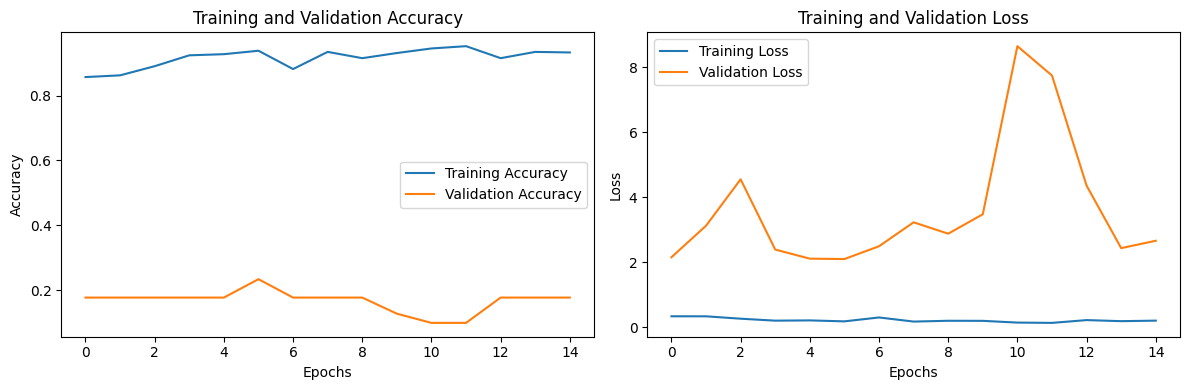

In [105]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [106]:
test_image_path = '/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/brown blight/UNADJUSTEDNONRAW_thumb_16e.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (256, 256))
test_image = np.expand_dims(test_image, axis=0) / 255.0

prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted class: red leaf spot


In [107]:
test_image_path = '/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/healthy/UNADJUSTEDNONRAW_thumb_208.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (256, 256))
test_image = np.expand_dims(test_image, axis=0) / 255.0

prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: red leaf spot


In [108]:
test_image_path = '/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/gray light/IMG_20220503_135357.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (256, 256))
test_image = np.expand_dims(test_image, axis=0) / 255.0

prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: red leaf spot


In [109]:
!pip install -U efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 891.8 kB/s eta 0:00:00a 0:00:01


# Defining the EfficientNet Model

In [110]:
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from efficientnet.tfkeras import EfficientNetB0

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


# Define input shape
input_shape = (256, 256, 3)

# Create an instance of EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Add global average pooling layer
x = layers.Dense(128, activation='relu')(x)  # Add dense layer
predictions = layers.Dense(len(target_folders), activation='softmax')(x)  # Add output layer

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [112]:
model.summary()

Model: "functional_99"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 128, 128,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 128, 128,  │      1,536 │ block1a_project_… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 128, 128,  │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 128, 128,  │          0 │ block2a_expand_b

 Total params: 4,214,564 (16.08 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 4,049,564 (15.45 MB)

In [113]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=20)

Epoch 1/20
 2/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.1328 - loss: 2.1888  

W0000 00:00:1712519361.955728      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/18 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2895 - loss: 1.8738 

W0000 00:00:1712519393.677440      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3041 - loss: 1.8444

W0000 00:00:1712519400.742636      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.3105 - loss: 1.8314 - val_accuracy: 0.5603 - val_loss: 1.1867
Epoch 2/20


W0000 00:00:1712519411.475451      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 911ms/step - accuracy: 0.6758 - loss: 0.9954 - val_accuracy: 0.6170 - val_loss: 0.9432
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 946ms/step - accuracy: 0.8127 - loss: 0.6398 - val_accuracy: 0.6596 - val_loss: 0.7808
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 868ms/step - accuracy: 0.7904 - loss: 0.6095 - val_accuracy: 0.7234 - val_loss: 0.7103
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 880ms/step - accuracy: 0.7979 - loss: 0.5405 - val_accuracy: 0.7092 - val_loss: 0.6686
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 878ms/step - accuracy: 0.8589 - loss: 0.4564 - val_accuracy: 0.7021 - val_loss: 0.7808
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 851ms/step - accuracy: 0.8443 - loss: 0.4406 - val_accuracy: 0.7305 - val_loss: 0.6149
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 863ms/step - accuracy: 0.8425 - loss: 0.4246 - val_accuracy: 0.7518 - val_loss: 0.6225
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 935ms/step - accuracy: 0.8820 - loss: 0.3785 - val_accuracy: 0.787

In [115]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Accuracy:", test_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7997 - loss: 0.6306
Test Accuracy: 0.8022598624229431


W0000 00:00:1712519913.951872      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


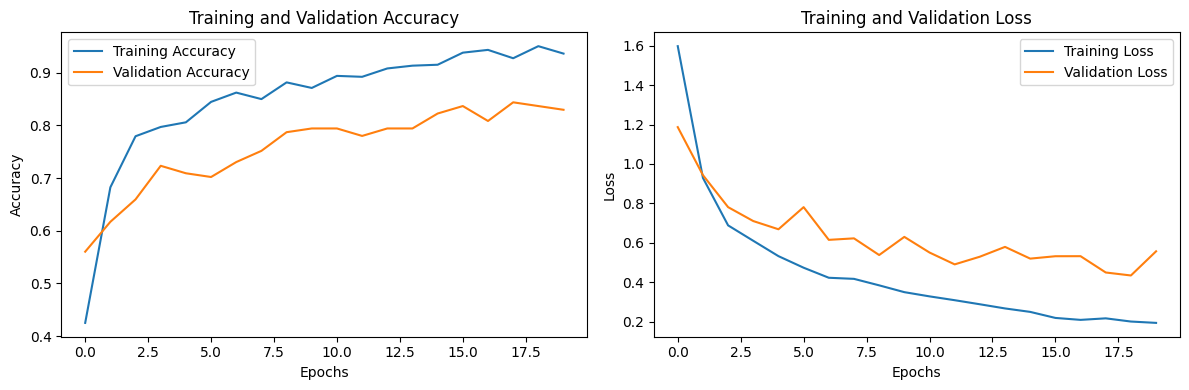

In [116]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [117]:
import cv2
from tensorflow.keras.preprocessing import image


img_path = '/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/algal leaf/UNADJUSTEDNONRAW_thumb_12.jpg'
img = cv2.imread(img_path)

img = cv2.resize(img, (256, 256))

img = img.astype('float32') / 255.0

img = np.expand_dims(img, axis=0)

prediction = model.predict(img)

predicted_label_index = np.argmax(prediction)
predicted_class = target_folders[predicted_label_index]

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted class: algal leaf


In [118]:
import cv2
from tensorflow.keras.preprocessing import image


img_path = '/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/gray light/IMG_20220503_135357.jpg'
img = cv2.imread(img_path)

img = cv2.resize(img, (256, 256))

img = img.astype('float32') / 255.0

img = np.expand_dims(img, axis=0)

prediction = model.predict(img)

predicted_label_index = np.argmax(prediction)
predicted_class = target_folders[predicted_label_index]

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: gray light


In [119]:
import cv2
from tensorflow.keras.preprocessing import image


img_path = '/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset/healthy/UNADJUSTEDNONRAW_thumb_20e.jpg'
img = cv2.imread(img_path)

img = cv2.resize(img, (256, 256))

img = img.astype('float32') / 255.0

img = np.expand_dims(img, axis=0)

prediction = model.predict(img)

predicted_label_index = np.argmax(prediction)
predicted_class = target_folders[predicted_label_index]

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: healthy
